In [1]:
pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 10.4 MB/s eta 0:00:00


In [2]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [14]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    operation: str
    result: str

In [5]:
import math

In [21]:
def multiply_or_add(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""
    if state["operation"] == "*":
        state["result"] = f"Hi {state['name']}, your answer is: {math.prod(state["values"])}"
    elif state["operation"] == "+":
        state["result"] = f"Hi {state['name']}, your answer is: {sum(state["values"])}"
    else:
        state["result"] = "Invalid Operation!"

    return state

In [22]:
graph = StateGraph(AgentState)

graph.add_node("operator", multiply_or_add)
graph.set_entry_point("operator")
graph.set_finish_point("operator")

app = graph.compile()

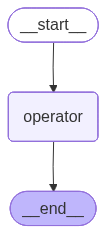

In [23]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [24]:
answer = app.invoke({"name": "Jack", "values": [1,2,3,4], "operation": "*"})

In [25]:
print(answer)

{'name': 'Jack', 'values': [1, 2, 3, 4], 'operation': '*', 'result': 'Hi Jack, your answer is: 24'}


In [26]:
print(answer["result"])

Hi Jack, your answer is: 24


In [27]:
answer = app.invoke({"name": "Jack", "values": [1,2,3,4], "operation": "+"})
print(answer["result"])

Hi Jack, your answer is: 10


In [28]:
answer = app.invoke({"name": "Jack", "values": [1,2,3,4], "operation": "."})
print(answer["result"])

Invalid Operation!
